In [9]:
import tensorflow as tf

tf_string = tf.constant('hello tensorflow')
tf_int = tf.constant(10)
tf_float = tf.constant(3.14)

print(tf_string)
print(tf_int)
print(tf_float)


Tensor("Const_10:0", shape=(), dtype=string)
Tensor("Const_11:0", shape=(), dtype=int32)
Tensor("Const_12:0", shape=(), dtype=float32)


In [2]:
tf_string.name

'Const:0'

In [3]:
tf_string.shape

TensorShape([])

In [4]:
tf_string.dtype

tf.string

In [6]:
one = tf.constant([[1, 1, 1]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)
print(matmul)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [7]:
one = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)
print(matmul)

Tensor("MatMul_1:0", shape=(3, 1), dtype=int32)


## Session

In [10]:
import tensorflow as tf

tf_string = tf.constant('hello tensorflow')
tf_int = tf.constant(10)
tf_float = tf.constant(3.14)

with tf.Session() as sess:
    _tf_string = sess.run(tf_string)
    _tf_int = sess.run(tf_int)
    _tf_float = sess.run(tf_float)
    
    print(_tf_string)
    print(_tf_int)
    print(_tf_float)

b'hello tensorflow'
10
3.14


In [15]:
one = tf.constant([[1, 1, 1]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)

with tf.Session() as sess:
    _matmul = sess.run(matmul)
    print(_matmul)

[[6]]


In [16]:
one = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)
with tf.Session() as sess:
    _matmul = sess.run(matmul)
    print(_matmul)

[[12]
 [30]
 [48]]


In [19]:
one = tf.constant([[1, 1, 1]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)

with tf.Session() as sess:
    _one, _two, _matmul = sess.run([one, two, matmul])
    print(_one)
    print(_two)
    print(_matmul)
    

[[1 1 1]]
[[2]
 [2]
 [2]]
[[6]]


## constant

In [20]:
const = tf.constant(10)

with tf.Session() as sess:
    print(sess.run(const))

10


## placeholder

In [21]:
data = [1, 2, 3, 4, 5]
p1_data = tf.placeholder(tf.float32)

with tf.Session() as sess:
    print(sess.run(p1_data, {p1_data: data}))

[ 1.  2.  3.  4.  5.]


## variable

In [23]:
var = tf.Variable(10)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(var))

10


# Linear Regression

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [40]:
samples = 1000
data = np.array([1e-2 * float(i) for i in range(samples)])
label = 3.3*data + 2.7 + np.random.randn(samples)
target = 3.3*data + 2.7
print(label[:10])

[ 2.50844169  2.80146298  2.12896475  4.58315823  3.6641888   2.71997138
  3.07121464  0.43197365  1.52494035  3.09460325]


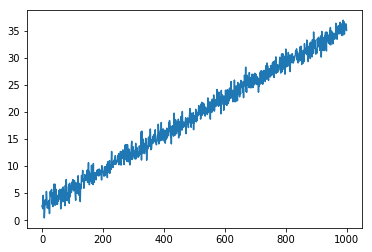

In [41]:
plt.plot(label)

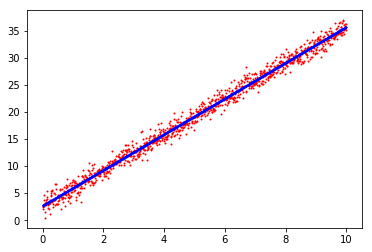

In [43]:
plt.scatter(data, label, 1, 'r')
plt.scatter(data, target, 1, 'b')

In [44]:
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

In [45]:
w = tf.Variable(8.8)
b = tf.Variable(-4.0)

In [46]:
y = w*x + b

In [63]:
loss = tf.losses.mean_squared_error(y_, y)
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [64]:
init = tf.global_variables_initializer()

0 686.066
100 6.13072
200 2.95408
300 1.76386
400 1.31791
500 1.15082
600 1.08822
700 1.06476
800 1.05598
900 1.05268


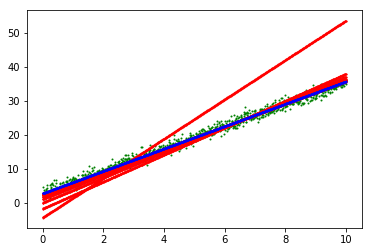

In [71]:
with tf.Session() as sess:
    sess.run(init)
    plt.scatter(data, label, 1, 'g')
    for i in range(1000):
        _, _loss = sess.run([train_op, loss], {x: data, y_: label})
        if i % 100 == 0:
            _pred = sess.run(y, {x: data})
            plt.scatter(data, _pred, 1, 'r')
            print(i, _loss)
    

    plt.scatter(data, target, 1, 'b')